In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [4]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()


In [6]:
ds = argo_loader.region([-75, -45, 20, 30, 0, 10, '2018-01-01', '2018-06']).to_xarray()
ds_1 = argo_loader.region([-75, -45, 20, 30, 0, 10, '2018-07-01', '2018-12']).to_xarray()

In [8]:
#ds = ArgoDataFetcher().profile(6902746, 30).to_xarray()
df = ds.to_dataframe()
print(df.head())
df.describe()

          CONFIG_MISSION_NUMBER  CYCLE_NUMBER DATA_MODE DIRECTION  \
N_POINTS                                                            
0                             5           131         D         A   
1                             5           131         D         A   
2                             5           131         D         A   
3                             5           131         D         A   
4                             5           131         D         A   

          PLATFORM_NUMBER  POSITION_QC  PRES  PRES_QC       PSAL  PSAL_QC  \
N_POINTS                                                                    
0                 4901700            1  1.08        1  36.773880        1   
1                 4901700            1  1.96        1  36.773788        1   
2                 4901700            1  2.96        1  36.773899        1   
3                 4901700            1  3.92        1  36.773880        1   
4                 4901700            1  5.00        1 

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE
count,5390.000000,5390.000000,5.390000e+03,5390.0,5390.000000,5390.0,5390.000000,5390.000000,5390.000000,5390.0,5390.0,5390.000000,5390.000000
mean,13.296104,100.291651,5.276541e+06,1.0,5.608754,1.0,36.873234,1.017811,24.246071,1.0,1.0,25.660127,-62.045614
std,30.165688,57.849867,1.102174e+06,0.0,2.694769,0.0,0.282824,0.132275,1.355596,0.0,0.0,2.928354,7.618674
min,-1.000000,24.000000,1.901661e+06,1.0,0.040000,1.0,35.907001,1.000000,20.954000,1.0,1.0,20.056000,-73.867600
25%,4.000000,47.000000,4.901625e+06,1.0,3.400000,1.0,36.700001,1.000000,23.136250,1.0,1.0,23.046640,-68.167120
50%,5.000000,83.000000,4.902343e+06,1.0,5.745000,1.0,36.851002,1.000000,24.392500,1.0,1.0,25.700950,-63.413500
75%,8.000000,150.000000,5.904669e+06,1.0,8.000000,1.0,37.013000,1.000000,25.329750,1.0,1.0,28.516680,-56.844593
max,177.000000,308.000000,6.902772e+06,1.0,10.300000,1.0,37.512001,2.000000,26.889999,1.0,1.0,29.981560,-45.027600


In [10]:
df_1 = ds_1.to_dataframe()
print(df_1.head())
df_1.describe()

          CONFIG_MISSION_NUMBER  CYCLE_NUMBER DATA_MODE DIRECTION  \
N_POINTS                                                            
0                             5           159         D         A   
1                             5           159         D         A   
2                             5           159         D         A   
3                             5           159         D         A   
4                             5           159         D         A   

          PLATFORM_NUMBER  POSITION_QC  PRES  PRES_QC       PSAL  PSAL_QC  \
N_POINTS                                                                    
0                 4901595            1  1.12        1  36.623001        1   
1                 4901595            1  2.00        1  36.624001        1   
2                 4901595            1  3.00        1  36.624001        1   
3                 4901595            1  3.96        1  36.625000        1   
4                 4901595            1  5.00        1 

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE
count,4348.000000,4348.000000,4.348000e+03,4348.0,4348.000000,4348.0,4348.000000,4348.00000,4348.000000,4348.0,4348.0,4348.000000,4348.000000
mean,7.452852,112.022999,5.144238e+06,1.0,5.511116,1.0,36.767071,1.00184,27.856770,1.0,1.0,25.847542,-62.245543
std,17.658398,58.877034,1.015261e+06,0.0,2.659690,0.0,0.503236,0.04286,1.065060,0.0,0.0,2.722543,7.905457
min,-1.000000,1.000000,1.901661e+06,1.0,0.440000,1.0,33.412498,1.00000,23.455999,1.0,1.0,20.104000,-74.746870
25%,4.000000,60.000000,4.901595e+06,1.0,3.040000,1.0,36.630831,1.00000,27.160000,1.0,1.0,24.026780,-69.694770
50%,5.000000,85.000000,4.902323e+06,1.0,5.600000,1.0,36.783085,1.00000,28.001000,1.0,1.0,26.139200,-62.705560
75%,6.000000,165.000000,4.902355e+06,1.0,7.960000,1.0,37.007000,1.00000,28.691999,1.0,1.0,28.386910,-57.166040
max,188.000000,230.000000,6.902772e+06,1.0,10.070000,1.0,37.667999,2.00000,29.920000,1.0,1.0,29.999190,-45.031840


In [12]:
df.keys()
list(df.keys())



['CONFIG_MISSION_NUMBER',
 'CYCLE_NUMBER',
 'DATA_MODE',
 'DIRECTION',
 'PLATFORM_NUMBER',
 'POSITION_QC',
 'PRES',
 'PRES_QC',
 'PSAL',
 'PSAL_QC',
 'TEMP',
 'TEMP_QC',
 'TIME_QC',
 'LATITUDE',
 'LONGITUDE',
 'TIME']

In [14]:
df_1.keys()
list(df_1.keys())

['CONFIG_MISSION_NUMBER',
 'CYCLE_NUMBER',
 'DATA_MODE',
 'DIRECTION',
 'PLATFORM_NUMBER',
 'POSITION_QC',
 'PRES',
 'PRES_QC',
 'PSAL',
 'PSAL_QC',
 'TEMP',
 'TEMP_QC',
 'TIME_QC',
 'LATITUDE',
 'LONGITUDE',
 'TIME']

In [16]:
df['TIME']= pd.to_datetime(df['TIME'])

In [18]:
df_1['TIME']= pd.to_datetime(df_1['TIME'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5389
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CONFIG_MISSION_NUMBER  5390 non-null   int32         
 1   CYCLE_NUMBER           5390 non-null   int32         
 2   DATA_MODE              5390 non-null   object        
 3   DIRECTION              5390 non-null   object        
 4   PLATFORM_NUMBER        5390 non-null   int32         
 5   POSITION_QC            5390 non-null   int32         
 6   PRES                   5390 non-null   float32       
 7   PRES_QC                5390 non-null   int32         
 8   PSAL                   5390 non-null   float32       
 9   PSAL_QC                5390 non-null   int32         
 10  TEMP                   5390 non-null   float32       
 11  TEMP_QC                5390 non-null   int32         
 12  TIME_QC                5390 non-null   int32         
 13  LAT

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4347
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CONFIG_MISSION_NUMBER  4348 non-null   int32         
 1   CYCLE_NUMBER           4348 non-null   int32         
 2   DATA_MODE              4348 non-null   object        
 3   DIRECTION              4348 non-null   object        
 4   PLATFORM_NUMBER        4348 non-null   int32         
 5   POSITION_QC            4348 non-null   int32         
 6   PRES                   4348 non-null   float32       
 7   PRES_QC                4348 non-null   int32         
 8   PSAL                   4348 non-null   float32       
 9   PSAL_QC                4348 non-null   int32         
 10  TEMP                   4348 non-null   float32       
 11  TEMP_QC                4348 non-null   int32         
 12  TIME_QC                4348 non-null   int32         
 13  LAT

In [24]:
Temp_Ave = np.average(df['TEMP'])
Temp_Ave
df['TEMP'].shape

(5390,)

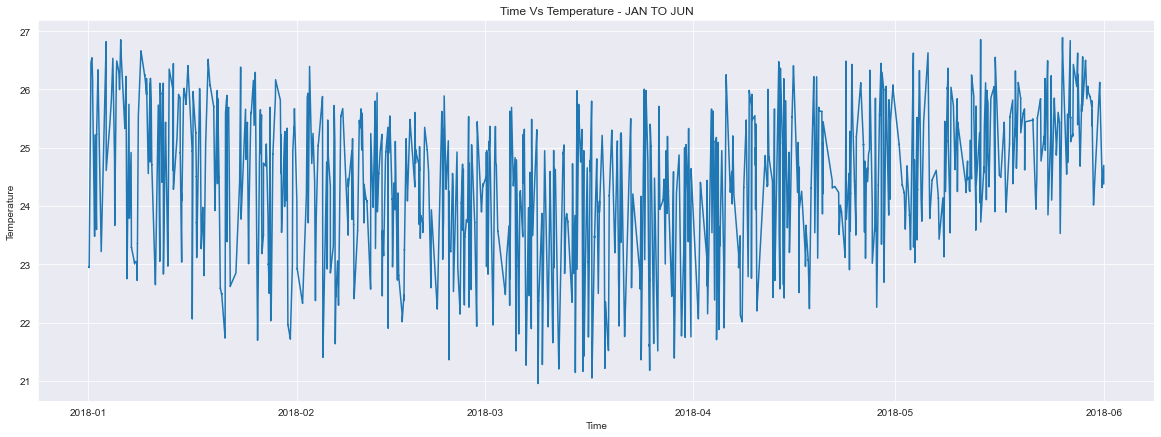

In [26]:
Temp = df['TEMP']
Time = df['TIME']
fig, ax = plt.subplots(figsize =(20,7))
plt.plot(Time, Temp)
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Time Vs Temperature - JAN TO JUN')
ax.grid()
    

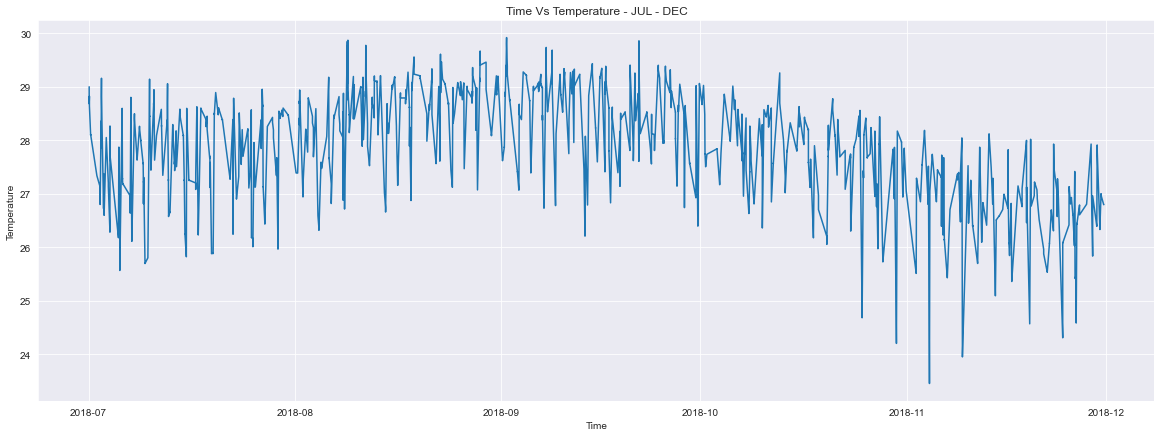

In [28]:
Temp_1 = df_1['TEMP']
Time_1 = df_1['TIME']
fig1, ax1 = plt.subplots(figsize =(20,7))
plt.plot(Time_1, Temp_1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Time Vs Temperature - JUL - DEC')
ax1.grid()
    

C:\Users\immao\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\immao\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


(<Figure size 720x720 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

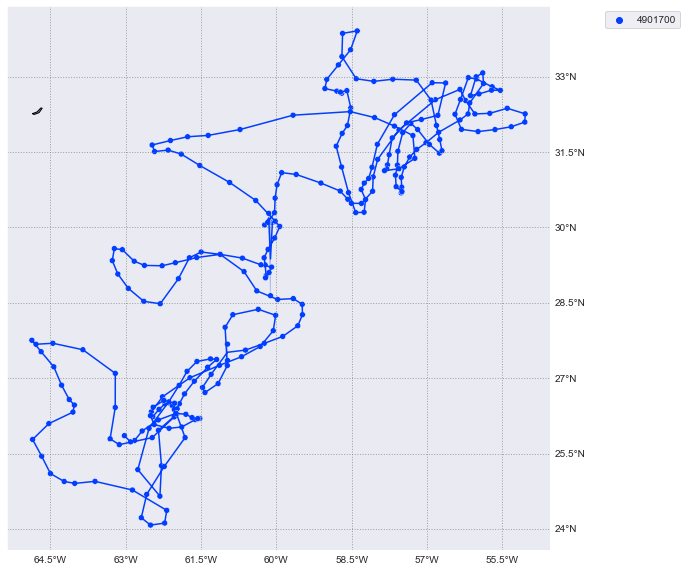

In [30]:
from argopy import IndexFetcher as ArgoIndexFetcher
idx = ArgoIndexFetcher().float([4901700])
idx.to_dataframe()
idx.plot('trajectory')